In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
from skimage.transform import resize
import skimage

In [2]:

def load_image_files(main_path,img_dim=(64, 64)):
    """
    This function Loads image files which works like scikit-learn.This image file has
    categories as subfolder names such as c1,c2,c3...c9,c10
    
    Parameters
    ----------
    main_path : string Path which contains one subfolder per category.
    img_dim : Size of the tuple to which the raw_input are adjusted.
        
    Returns
    -------
    Bunch
    """
    imgs_direc = Path(main_path)
    img_sub_folder = [directory for directory in imgs_direc.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in img_sub_folder]

    class_data = "A image classification dataset"
    raw_input = []
    flat_data = []
    target = []
    for i, direc in enumerate(img_sub_folder):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, img_dim, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            raw_input.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    raw_input = np.array(raw_input)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 raw_input=raw_input,
                 class_data=class_data)

In [4]:
image_dataset = load_image_files("imgs/train/")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=101)

In [6]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid,refit=True)
clf = clf.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [8]:
y_pred = clf.predict(X_test)

In [9]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       752
           1       1.00      1.00      1.00       700
           2       1.00      1.00      1.00       748
           3       1.00      1.00      1.00       677
           4       1.00      1.00      1.00       697
           5       1.00      1.00      1.

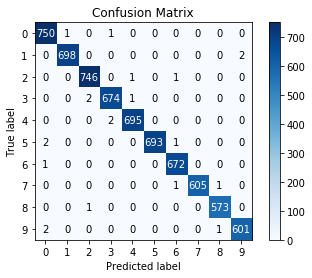

In [29]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.show()

In [13]:
import pickle
pkl_filename = "pickle_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

In [14]:
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

In [16]:
score = pickle_model.score(X_test, y_test)  
print("Test score: {0:.2f} %".format(100 * score))  
Y_predict = pickle_model.predict(X_test)

Test score: 99.69 %


In [17]:
print(clf.best_score_)

0.9950305810397554
